In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random


df = pd.read_csv("Preprocessed ICU data.csv")
df.shape

(1474, 232)

In [3]:
icu2_df = df[df["ICUType2"] == 1]
icu3_df = df[df["ICUType3"] == 1]
icu4_df = df[df["ICUType4"] == 1]
icu1_df = df[(df["ICUType2"] == 0) & (df["ICUType3"] == 0) & (df["ICUType4"] == 0)]


In [29]:
icu1_cleaned = icu1_df[
    [col for col in icu1_df.columns if col.endswith((".x", ".y"))] + ["In.hospital_death"]].copy()


icu2_cleaned = icu2_df[
    [col for col in icu2_df.columns if col.endswith((".x", ".y"))] + ["In.hospital_death"]
].copy()

icu3_cleaned = icu3_df[
    [col for col in icu3_df.columns if col.endswith((".x", ".y"))] + ["In.hospital_death"]
].copy()


icu4_cleaned = icu4_df[
    [col for col in icu4_df.columns if col.endswith((".x", ".y"))] + ["In.hospital_death"]
].copy()


<Axes: xlabel='Mean_Weight.x', ylabel='Mean_HR.x'>

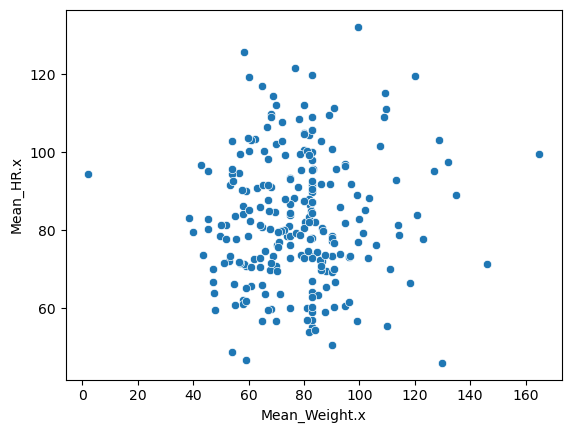

In [30]:
sns.scatterplot(data = icu1_cleaned, x = "Mean_Weight.x", y = "Mean_HR.x")

<Axes: xlabel='Mean_Weight.x', ylabel='Mean_HR.x'>

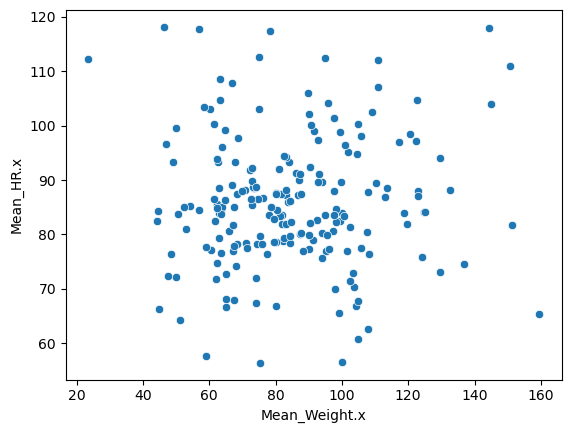

In [31]:
sns.scatterplot(data = icu2_cleaned, x = "Mean_Weight.x", y = "Mean_HR.x")

In [32]:
print(icu1_cleaned.shape)
print(icu2_cleaned.shape)
print(icu3_cleaned.shape)
print(icu4_cleaned.shape)

(242, 223)
(200, 223)
(690, 223)
(342, 223)


In [38]:
def do_rfe(df, n_features_to_select, step=1, random_state=42):
    X = df.drop(["In.hospital_death"], axis = 1)
    y = df["In.hospital_death"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = random_state)
    model = RandomForestClassifier(random_state=random_state)
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=step, verbose = 0)
    rfe.fit(X_train,y_train)
    ranking=rfe.ranking_
    selected_features = X.columns[rfe.support_]
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    model.fit(X_train_selected,y_train)
    y_pred=model.predict(X_test_selected)

    fin_hyper = RandomizedSearchCV(model, param_distributions = {'n_estimators': random.randint(50,500),'max_depth': random.randint(1,20)}, n_iter = 5, cv = 5)

    rand_search.fit(X_train, y_train)

    best_rfe = rand_search.best_estimator
    
    cross_val = rand_search.best_params
    results = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': ranking})

    classification_r = classification_report(y_test,y_pred)
    return (results,classification_r, cross_val)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [40]:
icu1_feat = do_rfe(icu1_cleaned, 15)

NameError: name 'rand_search' is not defined

In [14]:
icu2_feat = do_rfe(icu2_cleaned, 15)

In [15]:
icu3_feat = do_rfe(icu3_cleaned, 15)

In [ ]:
icu4_feat = do_rfe(icu4_cleaned, 15)

In [ ]:
icu1_rank = icu1_feat[0].sort_values(by='Ranking', ascending = True)
icu2_rank = icu2_feat[0].sort_values(by='Ranking', ascending = True)
icu3_rank = icu3_feat[0].sort_values(by='Ranking', ascending = True)
icu4_rank = icu4_feat[0].sort_values(by='Ranking', ascending = True)

In [ ]:
icu1_rank.head(20)

In [ ]:
icu2_rank.head(20)

In [ ]:
icu3_rank.head(20)

In [ ]:
icu4_rank.head(20)

In [ ]:
icu1_info = icu1_feat[1]
icu2_info = icu2_feat[1]
icu3_info = icu3_feat[1]
icu4_info = icu4_feat[1]

In [ ]:
info_sets = (icu1_info,icu2_info,icu3_info,icu4_info)
for i in range(4):
    print(info_sets[i])

High recall for one variable and not another.

Need to consider class imbalance - is the dataset too small?

Individual performance of datasets:

Icu1 - 

Icu2 - 

Icu3 - 

Icu4 - 

In [ ]:
icu1_cleaned

In [ ]:
icus = [icu1_cleaned,icu2_cleaned,icu3_cleaned,icu4_cleaned]
for i in range(4)
    class_counts = [len(icus[i]["In.hospital_death"] == 0]),len(icu1_cleaned[icu1_cleaned["In.hospital_death"] == 1])]

In [14]:
class_counts

[161, 81]

In [ ]:
print(icu1_feat[2])

In [ ]:
the_icus = [icu1_df,icu2_df,icu3_df]

import seaborn as sns
sns.set_theme(style="ticks")


for icu in the_icus:
    sns.pairplot(icu,hue="In.hospital_death")
    